In [1]:
import gensim.models
import os
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models.fasttext import FastText
from top2vec import Top2Vec


/Users/mstudio/miniforge3/envs/viraltext/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [32]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [33]:
paper='national_era'
word='servant'
df=pd.read_csv('snippet-dedupe/'+'dedupe_two_extended_'+paper+'_'+word+'.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'snippet-dedupe/dedupe_two_extended_national_era_servant.csv'

In [ ]:
def lemmatization(dataframe:pd.DataFrame()):
    dataframe['stopword']=dataframe['context'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    dataframe['punct']=dataframe['stopword'].str.replace('[^\w\s]','')
    dataframe['lower']=dataframe['punct'].str.lower()
    dataframe['lemma']=dataframe['lower'].apply(lambda row: " ".join([token.lemma_ for token in nlp(row)]))
    dataframe['token']=dataframe['lemma'].apply(word_tokenize)
    return dataframe

In [ ]:
df=lemmatization(df)
# sent=[row for row in df['token']]

/var/folders/3_/r8z51q092v566bd_r0g_zj640000gn/T/ipykernel_4841/2679988168.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['punct']=dataframe['stopword'].str.replace('[^\w\s]','')


In [ ]:
def word2vec(dataframe:pd.DataFrame(), word:str):
  dic={}
  sent=[row for row in dataframe['token']]
  model=Word2Vec(sent, min_count=1, workers=3, window=5, sg=1)
  for i in model.wv.most_similar(word, topn=len(model.wv.index_to_key), restrict_vocab=len(model.wv.index_to_key)):
    dic[i[0]]=i[1]
  sim=pd.DataFrame.from_dict(dic, orient='index')
  sim.reset_index(inplace=True) 
  sim.columns=['token', 'cosine']
  return sim

In [ ]:
def doc2vec(dataframe:pd.DataFrame(), word:str):
  dic={}
  sent=[row for row in dataframe['token']]
  documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sent)]
  model=Doc2Vec(documents, min_count=1, workers=3, window=5)#, sg=1)
  for i in model.wv.most_similar(word, topn=len(model.wv.index_to_key), restrict_vocab=len(model.wv.index_to_key)):
    dic[i[0]]=i[1]
  sim=pd.DataFrame.from_dict(dic, orient='index')
  sim.reset_index(inplace=True) 
  sim.columns=['token', 'cosine']
  return sim

In [ ]:
def fast_text(dataframe:pd.DataFrame(), word:str):
  dic={}
  sent=[row for row in dataframe['token']]
  model=FastText(sent, min_count=1, workers=3, window=3, sg=1)
  for i in model.wv.most_similar(word, topn=len(model.wv.index_to_key), restrict_vocab=len(model.wv.index_to_key)):
    dic[i[0]]=i[1]
  sim=pd.DataFrame.from_dict(dic, orient='index')
  sim.reset_index(inplace=True) 
  sim.columns=['token', 'cosine']
  return sim

In [ ]:
def top2vec(dataframe:pd.DataFrame(), word:str, int):
  texts=list(dataframe['lemma'])
  model = Top2Vec(texts, min_count=1)
  dic={}
  words, word_scores = model.similar_words(keywords=[word], keywords_neg=[], num_words=int)
  for word, score in zip(words, word_scores):
    dic[word]= score
  sim=pd.DataFrame.from_dict(dic, orient='index')
  sim.reset_index(inplace=True)
  sim.columns=['token', 'cosine']
  return sim

In [ ]:
os.chdir('three_embeddings')

In [ ]:
#word2vec embedding
word2vec(df, word).to_csv('word2vec_'+paper+'_window1_'+ word +'.csv')

In [ ]:
#doc2vec embedding
doc2vec(df, word).to_csv('doc2vec_'+paper+'_window1_'+ word +'.csv')

In [ ]:
#fasttext emebedding
fast_text(df, word).to_csv('fasttext_'+paper+'_window1_'+ word +'.csv')

In [ ]:
#top2vec embedding
top2vec(df, word, len(set([val for sublist in df['token'] for val in sublist]))).to_csv('top2vec_'+paper+'_window1_'+ word +'.csv')

2022-12-06 14:18:01,557 - top2vec - INFO - Pre-processing documents for training
2022-12-06 14:18:01,595 - top2vec - INFO - Creating joint document/word embedding
2022-12-06 14:18:04,012 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2022-12-06 14:18:09,421 - top2vec - INFO - Finding dense areas of documents
2022-12-06 14:18:09,463 - top2vec - INFO - Finding topics


word2vec visualization

In [ ]:
os.chdir('three_embeddings/word2vec')
paper='daily_dispatch'
slave_dispatch=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_dispatch=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
paper='abbeville_banner'
slave_abbeville=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_abbeville=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
paper='edgefield'
slave_edgefield=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_edgefield=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
paper='nashville_union_american'
slave_nashville=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_nashville=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
paper='anti_slavery_bugle'
slave_bugle=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_bugle=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
paper='green_mountain_freeman'
slave_green=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_green=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
paper='national_era'
slave_era=pd.read_csv('word2vec_'+paper+'_window1_'+ 'slave' +'.csv')
servant_era=pd.read_csv('word2vec_'+paper+'_window1_'+ 'servant' +'.csv')

In [ ]:
dispatch=pd.merge(slave_dispatch, servant_dispatch, on='token')
dispatch.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [ ]:
abbeville=pd.merge(slave_abbeville, servant_abbeville, on='token')
abbeville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [ ]:
edgefield=pd.merge(slave_edgefield, servant_edgefield, on='token')
edgefield.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [ ]:
nashville=pd.merge(slave_nashville, servant_nashville, on='token')
nashville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [ ]:
bugle=pd.merge(slave_bugle, servant_bugle, on='token')
bugle.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [ ]:
green=pd.merge(slave_green, servant_green, on='token')
green.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [ ]:
era=pd.merge(slave_era, servant_era, on='token')
era.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

Text(0, 0.5, 'servant')

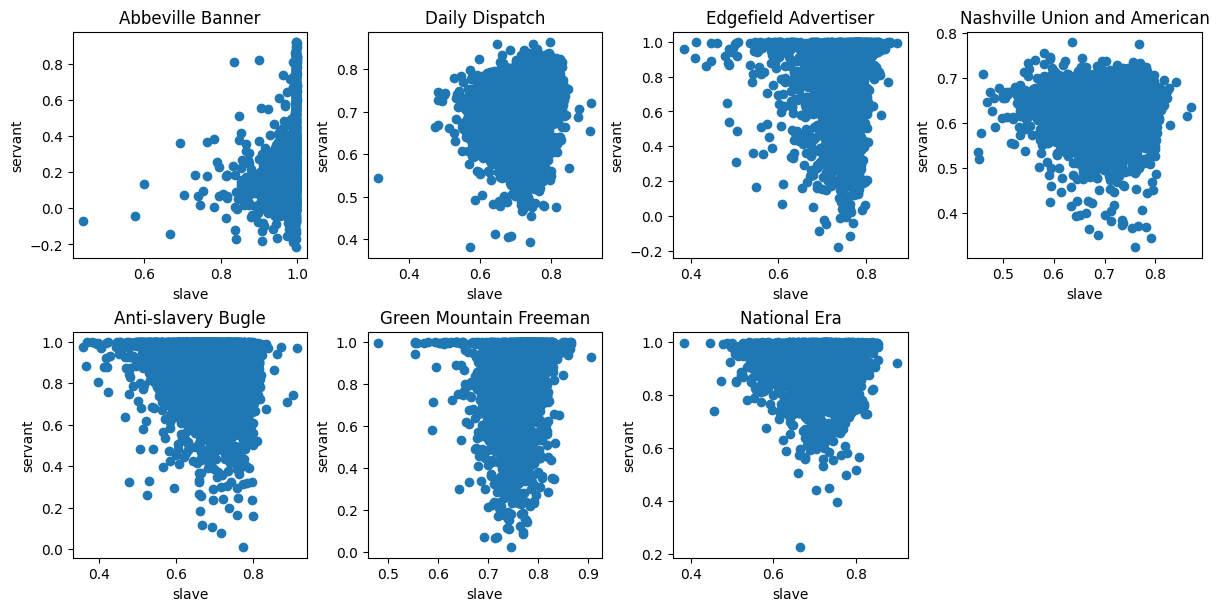

In [ ]:
f=plt.figure(figsize=(12,6), layout='constrained')
ax=f.add_subplot(2,4,1)
plt.scatter(abbeville['cosine_x'], abbeville['cosine_y'])
plt.title('Abbeville Banner')
plt.xlabel('slave')
plt.ylabel('servant')

ax2=f.add_subplot(2,4,2)
plt.scatter(dispatch['cosine_x'], dispatch['cosine_y'])
plt.title('Daily Dispatch')
plt.xlabel('slave')
plt.ylabel('servant')

ax3=f.add_subplot(2,4,3)
plt.scatter(edgefield['cosine_x'], edgefield['cosine_y'])
plt.title('Edgefield Advertiser')
plt.xlabel('slave')
plt.ylabel('servant')

ax4=f.add_subplot(2,4,4)
plt.scatter(nashville['cosine_x'], nashville['cosine_y'])
plt.title('Nashville Union and American')
plt.xlabel('slave')
plt.ylabel('servant')

ax5=f.add_subplot(2,4,5)
plt.scatter(bugle['cosine_x'], bugle['cosine_y'])
plt.title('Anti-slavery Bugle')
plt.xlabel('slave')
plt.ylabel('servant')

ax6=f.add_subplot(2,4,6)
plt.scatter(green['cosine_x'], green['cosine_y'])
plt.title('Green Mountain Freeman')
plt.xlabel('slave')
plt.ylabel('servant')

ax7=f.add_subplot(2,4,7)
plt.scatter(era['cosine_x'], era['cosine_y'])
plt.title('National Era')
plt.xlabel('slave')
plt.ylabel('servant')

doc2vec visualization

In [2]:
os.chdir('three_embeddings/doc2vec')
model='doc2vec'
paper='daily_dispatch'
slave_dispatch=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_dispatch=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [3]:
paper='abbeville_banner'
model='doc2vec'
slave_abbeville=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_abbeville=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [4]:
paper='edgefield'
model='doc2vec'
slave_edgefield=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_edgefield=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [5]:
paper='nashville_union_american'
model='doc2vec'
slave_nashville=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_nashville=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [6]:
paper='anti_slavery_bugle'
model='doc2vec'
slave_bugle=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_bugle=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [7]:
paper='green_mountain_freeman'
model='doc2vec'
slave_green=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_green=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [8]:
paper='national_era'
slave_era=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_era=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [9]:
dispatch=pd.merge(slave_dispatch, servant_dispatch, on='token')
dispatch.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [10]:
abbeville=pd.merge(slave_abbeville, servant_abbeville, on='token')
abbeville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [11]:
edgefield=pd.merge(slave_edgefield, servant_edgefield, on='token')
edgefield.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [12]:
nashville=pd.merge(slave_nashville, servant_nashville, on='token')
nashville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [13]:
bugle=pd.merge(slave_bugle, servant_bugle, on='token')
bugle.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [14]:
green=pd.merge(slave_green, servant_green, on='token')
green.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [15]:
era=pd.merge(slave_era, servant_era, on='token')
era.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

Text(0, 0.5, 'servant')

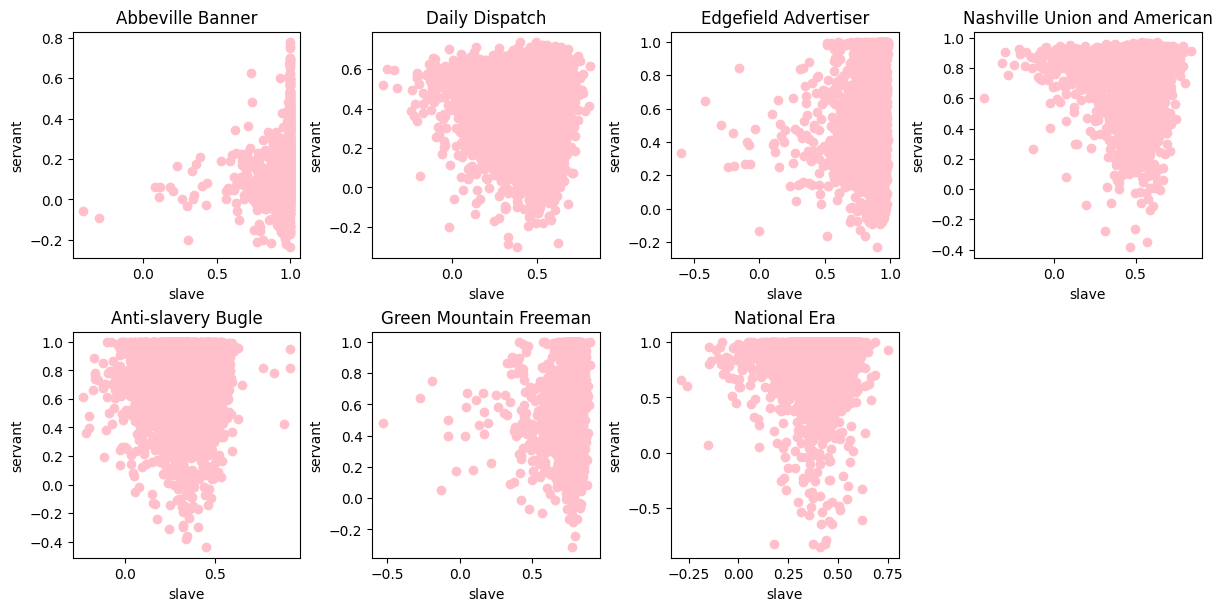

In [16]:
f=plt.figure(figsize=(12,6), layout='constrained')
ax=f.add_subplot(2,4,1)
plt.scatter(abbeville['cosine_x'], abbeville['cosine_y'], color='pink')
plt.title('Abbeville Banner')
plt.xlabel('slave')
plt.ylabel('servant')

ax2=f.add_subplot(2,4,2)
plt.scatter(dispatch['cosine_x'], dispatch['cosine_y'], color='pink')
plt.title('Daily Dispatch')
plt.xlabel('slave')
plt.ylabel('servant')

ax3=f.add_subplot(2,4,3)
plt.scatter(edgefield['cosine_x'], edgefield['cosine_y'], color='pink')
plt.title('Edgefield Advertiser')
plt.xlabel('slave')
plt.ylabel('servant')

ax4=f.add_subplot(2,4,4)
plt.scatter(nashville['cosine_x'], nashville['cosine_y'], color='pink')
plt.title('Nashville Union and American')
plt.xlabel('slave')
plt.ylabel('servant')

ax5=f.add_subplot(2,4,5)
plt.scatter(bugle['cosine_x'], bugle['cosine_y'], color='pink')
plt.title('Anti-slavery Bugle')
plt.xlabel('slave')
plt.ylabel('servant')

ax6=f.add_subplot(2,4,6)
plt.scatter(green['cosine_x'], green['cosine_y'], color='pink')
plt.title('Green Mountain Freeman')
plt.xlabel('slave')
plt.ylabel('servant')

ax7=f.add_subplot(2,4,7)
plt.scatter(era['cosine_x'], era['cosine_y'], color='pink')
plt.title('National Era')
plt.xlabel('slave')
plt.ylabel('servant')

fasttext visualization

In [19]:
os.chdir('../fasttext')
model='fasttext'
paper='daily_dispatch'
slave_dispatch=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_dispatch=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [20]:
paper='abbeville_banner'
model='fasttext'
slave_abbeville=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_abbeville=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [21]:
paper='edgefield'
model='fasttext'
slave_edgefield=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_edgefield=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [22]:
paper='nashville_union_american'
model='fasttext'
slave_nashville=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_nashville=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [23]:
paper='anti_slavery_bugle'
model='fasttext'
slave_bugle=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_bugle=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [24]:
paper='green_mountain_freeman'
model='fasttext'
slave_green=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_green=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [25]:
paper='national_era'
model='fasttext'
slave_era=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_era=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [26]:
dispatch=pd.merge(slave_dispatch, servant_dispatch, on='token')
dispatch.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [27]:
abbeville=pd.merge(slave_abbeville, servant_abbeville, on='token')
abbeville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [28]:
edgefield=pd.merge(slave_edgefield, servant_edgefield, on='token')
edgefield.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [29]:
nashville=pd.merge(slave_nashville, servant_nashville, on='token')
nashville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [30]:
bugle=pd.merge(slave_bugle, servant_bugle, on='token')
bugle.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [31]:
green=pd.merge(slave_green, servant_green, on='token')
green.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [32]:
era=pd.merge(slave_era, servant_era, on='token')
era.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

Text(0, 0.5, 'servant')

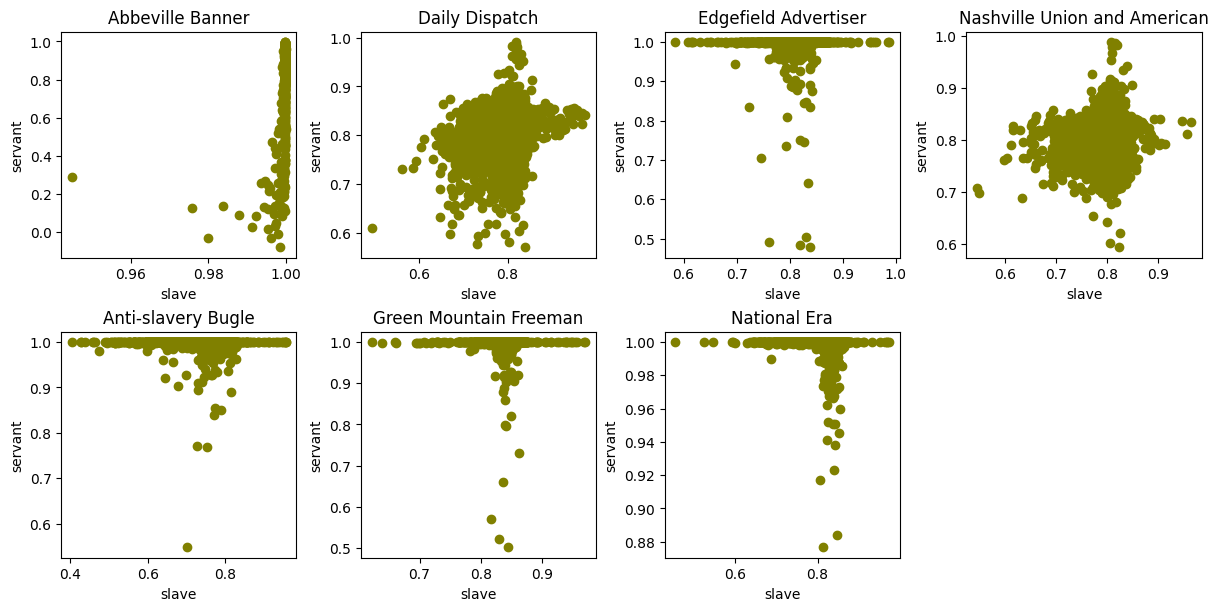

In [33]:
f=plt.figure(figsize=(12,6), layout='constrained')
ax=f.add_subplot(2,4,1)
plt.scatter(abbeville['cosine_x'], abbeville['cosine_y'], color='olive')
plt.title('Abbeville Banner')
plt.xlabel('slave')
plt.ylabel('servant')

ax2=f.add_subplot(2,4,2)
plt.scatter(dispatch['cosine_x'], dispatch['cosine_y'], color='olive')
plt.title('Daily Dispatch')
plt.xlabel('slave')
plt.ylabel('servant')

ax3=f.add_subplot(2,4,3)
plt.scatter(edgefield['cosine_x'], edgefield['cosine_y'], color='olive')
plt.title('Edgefield Advertiser')
plt.xlabel('slave')
plt.ylabel('servant')

ax4=f.add_subplot(2,4,4)
plt.scatter(nashville['cosine_x'], nashville['cosine_y'], color='olive')
plt.title('Nashville Union and American')
plt.xlabel('slave')
plt.ylabel('servant')

ax5=f.add_subplot(2,4,5)
plt.scatter(bugle['cosine_x'], bugle['cosine_y'], color='olive')
plt.title('Anti-slavery Bugle')
plt.xlabel('slave')
plt.ylabel('servant')

ax6=f.add_subplot(2,4,6)
plt.scatter(green['cosine_x'], green['cosine_y'], color='olive')
plt.title('Green Mountain Freeman')
plt.xlabel('slave')
plt.ylabel('servant')

ax7=f.add_subplot(2,4,7)
plt.scatter(era['cosine_x'], era['cosine_y'], color='olive')
plt.title('National Era')
plt.xlabel('slave')
plt.ylabel('servant')

top2vec visualization

In [34]:
os.chdir('../top2vec')
model='top2vec'
paper='daily_dispatch'
slave_dispatch=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_dispatch=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [35]:
paper='abbeville_banner'
model='top2vec'
slave_abbeville=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_abbeville=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [36]:
paper='edgefield'
model='top2vec'
slave_edgefield=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_edgefield=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [37]:
paper='nashville_union_american'
model='top2vec'
slave_nashville=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_nashville=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [38]:
paper='anti_slavery_bugle'
model='top2vec'
slave_bugle=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_bugle=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [39]:
paper='green_mountain_freeman'
model='top2vec'
slave_green=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_green=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [40]:
paper='national_era'
model='top2vec'
slave_era=pd.read_csv(model+'_'+paper+'_window1_'+ 'slave' +'.csv')
servant_era=pd.read_csv(model+'_'+paper+'_window1_'+ 'servant' +'.csv')

In [41]:
dispatch=pd.merge(slave_dispatch, servant_dispatch, on='token')
dispatch.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [42]:
abbeville=pd.merge(slave_abbeville, servant_abbeville, on='token')
abbeville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [43]:
edgefield=pd.merge(slave_edgefield, servant_edgefield, on='token')
edgefield.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [44]:
nashville=pd.merge(slave_nashville, servant_nashville, on='token')
nashville.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [45]:
bugle=pd.merge(slave_bugle, servant_bugle, on='token')
bugle.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [46]:
green=pd.merge(slave_green, servant_green, on='token')
green.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

In [47]:
era=pd.merge(slave_era, servant_era, on='token')
era.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'token'], inplace=True)

Text(0, 0.5, 'servant')

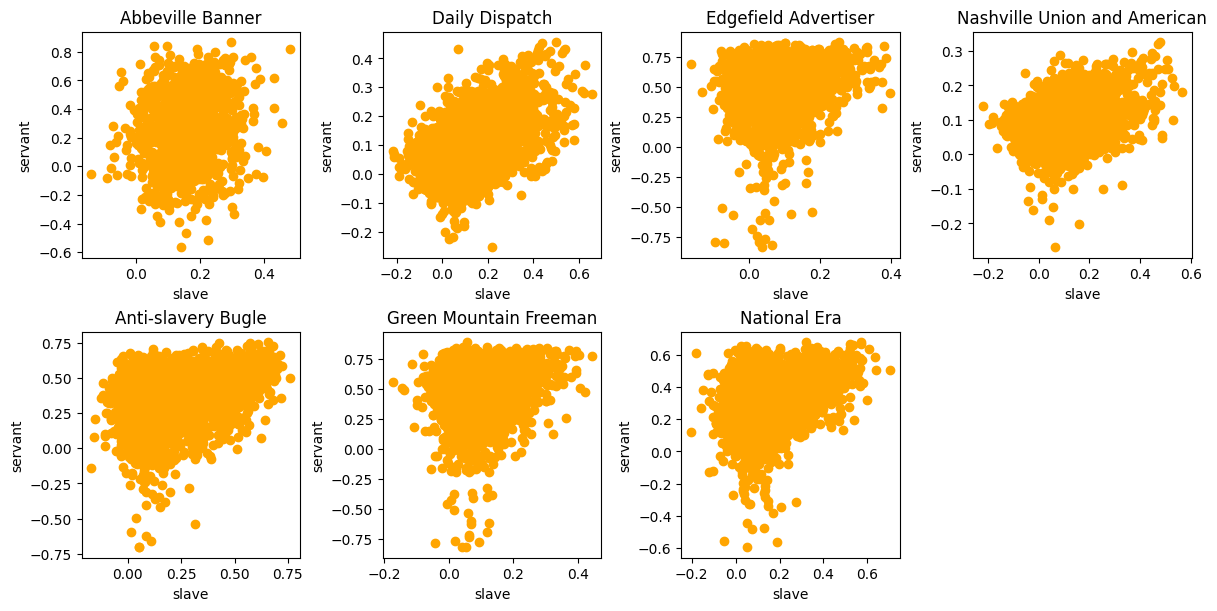

In [49]:
f=plt.figure(figsize=(12,6), layout='constrained')
ax=f.add_subplot(2,4,1)
plt.scatter(abbeville['cosine_x'], abbeville['cosine_y'], color='orange')
plt.title('Abbeville Banner')
plt.xlabel('slave')
plt.ylabel('servant')

ax2=f.add_subplot(2,4,2)
plt.scatter(dispatch['cosine_x'], dispatch['cosine_y'], color='orange')
plt.title('Daily Dispatch')
plt.xlabel('slave')
plt.ylabel('servant')

ax3=f.add_subplot(2,4,3)
plt.scatter(edgefield['cosine_x'], edgefield['cosine_y'], color='orange')
plt.title('Edgefield Advertiser')
plt.xlabel('slave')
plt.ylabel('servant')

ax4=f.add_subplot(2,4,4)
plt.scatter(nashville['cosine_x'], nashville['cosine_y'], color='orange')
plt.title('Nashville Union and American')
plt.xlabel('slave')
plt.ylabel('servant')

ax5=f.add_subplot(2,4,5)
plt.scatter(bugle['cosine_x'], bugle['cosine_y'], color='orange')
plt.title('Anti-slavery Bugle')
plt.xlabel('slave')
plt.ylabel('servant')

ax6=f.add_subplot(2,4,6)
plt.scatter(green['cosine_x'], green['cosine_y'], color='orange')
plt.title('Green Mountain Freeman')
plt.xlabel('slave')
plt.ylabel('servant')

ax7=f.add_subplot(2,4,7)
plt.scatter(era['cosine_x'], era['cosine_y'], color='orange')
plt.title('National Era')
plt.xlabel('slave')
plt.ylabel('servant')